# Visualization Data using matplotlib

This notebook shows you how to vizualize your results by using the `matplotlib` library. 

## Table of contents


4. [Explore data](#explore_data)

5. [Plot the results](#plot_data)

6. [Download the notebook](#download)

7. [Summary](#summary)


### Insert code to access the data source

To add the code to access the `precipitation.csv` file which is stored in Object Storage, click the next code cell and select **Insert to code>pandas DataFrame** on the data file that you loaded in the `Data` pane in the notebook.

This function inserts the setup and data loading code for you. The setup code includes importing the required packages and defining a helper function. The helper function includes the Object Storage credentials to access the `precipitation.csv` file. Then, the data in the `precipitation.csv` file is loaded into a `pandas DataFrame`.


<div class="alert alert-block alert-info">Note: The DataFrame that is created for you and filled with data is given a generic name. Rename the DataFrame to `precipitation_df` and run the code cell to proceed.</div>

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

In [3]:
# The code was removed by DSX for sharing.

In [4]:

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_26e786c69d8243259d12d9a8448058dc('JKC1Project', 'UNdata_poverty_ratio.csv'))
df_data_2.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2011,35.8,1
1,Afghanistan,2008,36.3,2
2,Albania,2012,14.3,3
3,Albania,2008,12.4,4
4,Albania,2005,18.5,4


In [ ]:
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_26e786c69d8243259d12d9a8448058dc('JKC1Project', 'UNdata_Export_20150921_104154271.csv'))
df_data_1.head()


<a id="explore_data"></a> 
## 4. Explore data

Now that your data is in memory, you can begin to explore and manipulate it.

Show the first five and the last five rows of the data by using the `head()` and `tail()` methods.  Run each code cell:

In [5]:
df_data_2.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2011,35.8,1
1,Afghanistan,2008,36.3,2
2,Albania,2012,14.3,3
3,Albania,2008,12.4,4
4,Albania,2005,18.5,4


In [6]:
df_data_2.count()

Country or Area    908
Year               908
Value              636
Value Footnotes    637
dtype: int64

In [8]:
list(df_data_2.columns.values)

['Country or Area', 'Year', 'Value', 'Value Footnotes']

In [5]:
df_data_2.columns = ['Country', 'Year', 'Value', 'Footnotes']

In [6]:
list(df_data_2.columns.values)

['Country', 'Year', 'Value', 'Footnotes']

In [18]:
print(df_data_2.Country.unique())

['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 'Cote d&apos;Ivoire' 'Croatia' 'Czech Republic' 'Dominican Republic'
 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Fiji' 'Gabon' 'Gambia, The' 'Georgia' 'Ghana'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hungary' 'India'
 'Indonesia' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kyrgyz Republic' 'Lao PDR' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Mali'
 'Mauritania' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Pakistan'
 'Panama' 'Papua New 

In [6]:
print df_data_2._slice(slice(0,641))

                Country  Year  Value  Footnotes
0           Afghanistan  2011   35.8          1
1           Afghanistan  2008   36.3          2
2               Albania  2012   14.3          3
3               Albania  2008   12.4          4
4               Albania  2005   18.5          4
5               Albania  2002   25.4          4
6                Angola  2008   36.6          5
7               Armenia  2013     32          6
8               Armenia  2012   32.4          7
9               Armenia  2011     35          8
10              Armenia  2010   35.8          9
11              Armenia  2009   34.1         10
12              Armenia  2008   27.6         11
13              Armenia  2001   48.3         12
14           Azerbaijan  2013    5.3        NaN
15           Azerbaijan  2012      6         14
16           Azerbaijan  2011    7.6         14
17           Azerbaijan  2010    9.1         14
18           Azerbaijan  2009   10.9         14
19           Azerbaijan  2008   13.2    

In [7]:
poverty = df_data_2._slice(slice(0,641))

In [8]:
poverty = poverty.drop('Footnotes', axis=1)

In [9]:
print poverty

                Country  Year  Value
0           Afghanistan  2011   35.8
1           Afghanistan  2008   36.3
2               Albania  2012   14.3
3               Albania  2008   12.4
4               Albania  2005   18.5
5               Albania  2002   25.4
6                Angola  2008   36.6
7               Armenia  2013     32
8               Armenia  2012   32.4
9               Armenia  2011     35
10              Armenia  2010   35.8
11              Armenia  2009   34.1
12              Armenia  2008   27.6
13              Armenia  2001   48.3
14           Azerbaijan  2013    5.3
15           Azerbaijan  2012      6
16           Azerbaijan  2011    7.6
17           Azerbaijan  2010    9.1
18           Azerbaijan  2009   10.9
19           Azerbaijan  2008   13.2
20           Azerbaijan  2007   15.8
21           Azerbaijan  2001   49.6
22           Bangladesh  2010  31.51
23           Bangladesh  2005     40
24           Bangladesh  2000   48.9
25           Bangladesh  1996   50.1
2

In [35]:
print poverty.dtypes

Country    object
Year       object
Value      object
dtype: object


In [10]:
poverty[['Year', 'Value']] = poverty[['Year', 'Value']].apply(pd.to_numeric)

In [38]:
print poverty.dtypes

Country     object
Year         int64
Value      float64
dtype: object


<a id="plot_data"></a> 
## 5. Plot the results

When you work in notebooks, you can decide how to present your anlysis results and derived information. So far, you have used normal print functions, which are informative. However, you can also show your results in a visual way by using the popular [`matplotlib`](http://matplotlib.org/) package to create plots.

First, render your results as inline charts:

In [11]:
%matplotlib inline 

In [12]:
import matplotlib.pyplot as plt, numpy as np

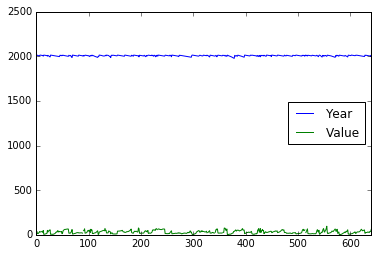

In [39]:
poverty.plot()

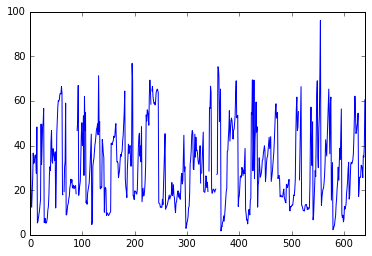

In [40]:
poverty['Value'].plot()

<Container object of 641 artists>

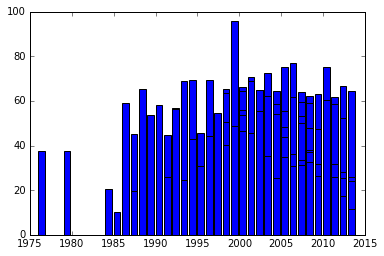

In [43]:
plt.bar(poverty['Year'], poverty['Value'], color='b')

In [47]:
poverty_pivot = poverty.pivot_table(index = ['Year'], values =['Value'], columns=['Country'])

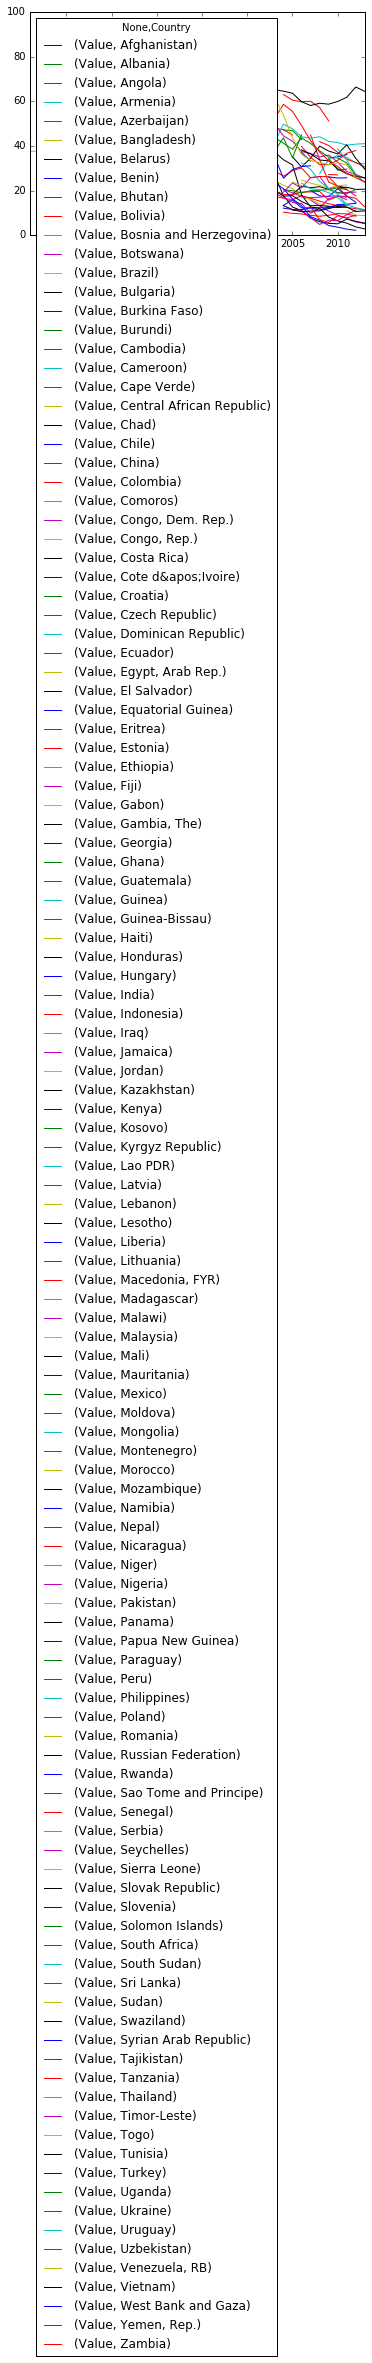

In [48]:
poverty_pivot.plot()

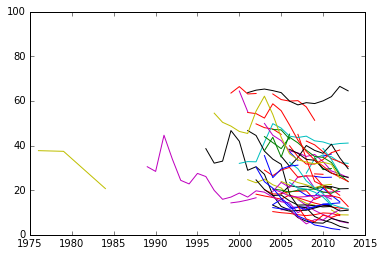

In [50]:
plt.plot(poverty_pivot)
plt.show()

In [58]:
poverty_index = poverty.set_index(poverty['Country'])

In [62]:
poverty_index = poverty_index.drop('Country', axis = 1)

In [76]:
afgan

,Year,Value
Country,,
Afghanistan,2011,35.8
Afghanistan,2008,36.3


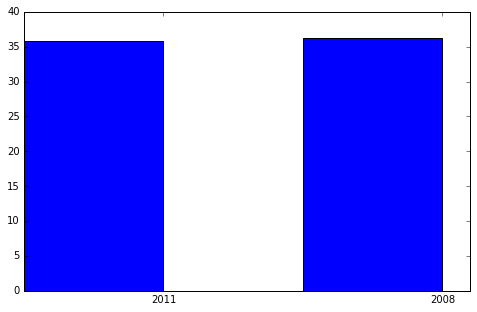

In [90]:
afgan = poverty_index.ix['Afghanistan']
index = np.arange(len(afgan.index))
plt.figure(figsize=(8,5))
bar_width = 0.5
plt.bar(index, afgan['Value'], bar_width, color ='b')
plt.xticks(index + bar_width, afgan['Year'], rotation=0)
plt.show()

In [91]:
afgan

,Year,Value
Country,,
Afghanistan,2011,35.8
Afghanistan,2008,36.3


In [ ]:
france = precipitation_df.ix['France']
years = france.index
index = np.arange(len(years))  
plt.figure(figsize=(8,5))
bar_width = 0.5
plt.bar(index, france, bar_width, color='b')
plt.xlabel("Year")
plt.ylabel("Precipitation (million cubic meters)")
plt.title("Precipitation of %s between 1990 to 2009" % france.name, y=1.08)
plt.xticks(index + bar_width, years, rotation=90)
plt.show()

In [ ]:
fig, axes = plt.subplots(1,1)
poverty.groupby('Country').plot(x='Year', y='Value', ax=axes)

In [ ]:
for year, grp in poverty.groupby('Country'):
    plt.plot(x='Year', y ='Value')
plt.show()

In [37]:
print poverty.groupby('Country')

In [38]:
group_country = poverty.groupby('Country')

In [41]:
print group_country

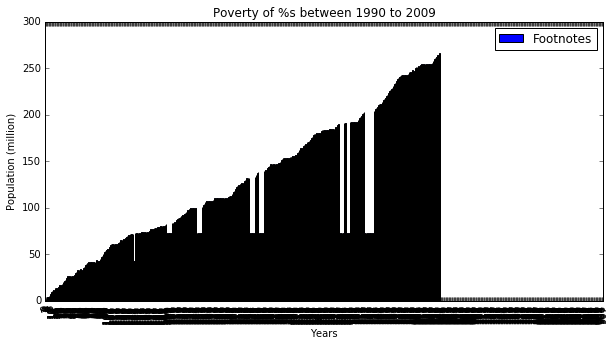

In [15]:
ax = poverty.plot(kind='bar', figsize=(10,5), title="Poverty of %s between 1990 to 2009" )
ax.set_ylabel("Population (million)")
ax.set_xlabel("Years");

In [ ]:
korea.index
korea.set_index('Year')

In [ ]:
ax = korea.set_index('Year').plot(kind='bar', figsize=(10,5), title="Population of Korea between 1990 to 2009" )
ax.set_ylabel("Population (million)")
ax.set_xlabel("Years");

In [ ]:
korea['Value'].plot(kind='bar', figsize=(12,10))

In [ ]:
korea.plot()


In [ ]:
korea['Value'].plot()

In [ ]:
korea['Value'].plot(kind='bar', figsize=(12,10))

In [ ]:
japan = df_population_simple.ix['JAPAN']

In [ ]:
plt.plot(japan['Year'], japan['Value'], color='b')

In [ ]:
plt.plot(korea.index, korea['Value'])

In [ ]:
plt.plot(japan['Year'], japan['Value'])
plt.plot(korea.index, korea['Value'])
plt.legend(['Japan', 'Korea'], loc='upper left')
plt.show()

In [ ]:
df_country_year = df_data_1.set_index(['Country', 'Year'])

In [ ]:
df_simple = df_data_1.get(['Country','Year', 'Item', 'Value'])

In [ ]:
df_pivot = df_simple.pivot_table('Value', ['Country', 'Year'], 'Item')

In [ ]:
# GROSS NATIONAL INCOME (GNI), POPULATION




### Author
Sven Hafeneger is a member of the Data Science Experience development team at IBM Analytics in Germany. He holds a M.Sc. in Bioinformatics and is passionate about data analysis, machine learning and the Python ecosystem for data science. 